In [15]:
import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.models import RNNModel
from darts.models import BlockRNNModel
from darts.models import TransformerModel
from darts.models import TCNModel
from darts import concatenate
from darts.metrics import mase
from darts.metrics import mape
from darts.metrics import mse
from darts.metrics import rmse
import itertools
import matplotlib.pyplot as plt

In [22]:
# Fixez les graines aléatoires
seed_value = 0

In [3]:
#Importing target times series
df_target = pd.read_csv("C:/Users/jbonhomme/OneDrive - EDF Renouvelables/Documents/GitHub/Darts_Project/Data/Transformed/B5_cycles_capacity.csv", encoding='utf-8')
df_target = df_target.rename(columns={'Parameter': 'Capacity',})
#df_target['Cycle'] = pd.to_datetime(df_target['Cycle'])

In [4]:
#Importing covariates
df_voltage = pd.read_csv("C:/Users/jbonhomme/OneDrive - EDF Renouvelables/Documents/GitHub/Darts_Project/Data/Transformed/time_series_voltage_table.csv", encoding='utf-8')
df_voltage = df_voltage.rename(columns={'index': 'Cycle',})
#df_cov['Cycle'] = pd.to_datetime(df_cov['Cycle'])

df_current = pd.read_csv("C:/Users/jbonhomme/OneDrive - EDF Renouvelables/Documents/GitHub/Darts_Project/Data/Transformed/time_series_current_table.csv", encoding='utf-8')
df_current = df_current.rename(columns={'index': 'Cycle',})

df_temp = pd.read_csv("C:/Users/jbonhomme/OneDrive - EDF Renouvelables/Documents/GitHub/Darts_Project/Data/Transformed/time_series_temp_table.csv", encoding='utf-8')
df_temp = df_temp.rename(columns={'index': 'Cycle',})

df_time = pd.read_csv("C:/Users/jbonhomme/OneDrive - EDF Renouvelables/Documents/GitHub/Darts_Project/Data/Transformed/time_series_time_table.csv", encoding='utf-8')
df_time = df_time.rename(columns={'index': 'Cycle',})

In [5]:
#Converting the target and covariate dataframe in a Darts time series format
target_series = TimeSeries.from_dataframe(df_target, 'Cycle', 'Capacity')

value_columns = df_voltage.columns.drop('Cycle').tolist()
cov_voltage_time_series = TimeSeries.from_dataframe(df_voltage, 'Cycle', value_columns)
value_columns = df_current.columns.drop('Cycle').tolist()
cov_current_time_series = TimeSeries.from_dataframe(df_current, 'Cycle', value_columns)
value_columns = df_temp.columns.drop('Cycle').tolist()
cov_temp_time_series = TimeSeries.from_dataframe(df_temp, 'Cycle', value_columns)
value_columns = df_time.columns.drop('Cycle').tolist()
cov_time_time_series = TimeSeries.from_dataframe(df_time, 'Cycle', value_columns)
past_covariates = concatenate([cov_voltage_time_series, cov_current_time_series, cov_temp_time_series, cov_time_time_series], axis=1)
# past_covariates = past_covariates[:train_size]

In [100]:
# We first set aside the first 50% as training series:
train_size = int(len(target_series) * 0.9)
train_dataset = target_series[:train_size]
test_dataset = target_series[train_size:]

In [ ]:
# Stocker les valeurs de perte
loss_values = []

# Fonction de rappel pour collecter la perte après chaque époque
def loss_callback(epoch, loss):
    loss_values.append(loss)

In [ ]:
#Define and train model
brnn = BlockRNNModel(input_chunk_length=30,
                     output_chunk_length=5,
                     model='LSTM',
                     n_rnn_layers=4,
                     random_state=seed_value
                     )
brnn.fit(train_dataset, 
         past_covariates=past_covariates, 
         epochs=100, 
         verbose=True,
         loss_fn=loss_callback)


In [ ]:
# Tracer la courbe de perte
plt.figure(figsize=(10, 6))
plt.plot(loss_values, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='Cycle'>

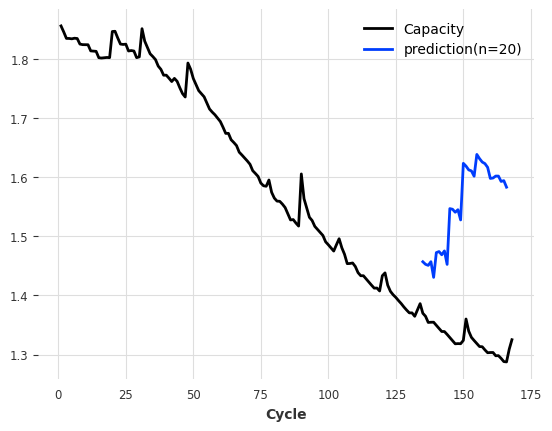

In [20]:
#Make prediction
future = brnn.predict(n=32,
                       series=train_dataset,
                       past_covariates=past_covariates)
# mase_err = mase(target_series, future, train_dataset)
target_series.plot()
future.plot(label='prediction(n=20)')
# print('Prediction MASE = {}'.format(mase_err))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=100` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

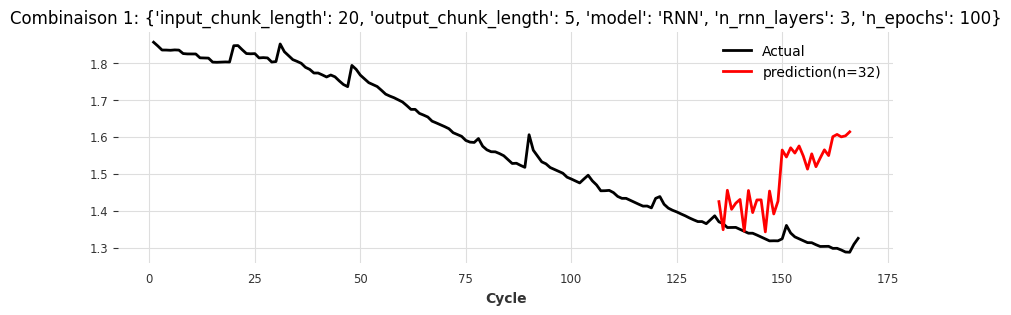

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=500` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

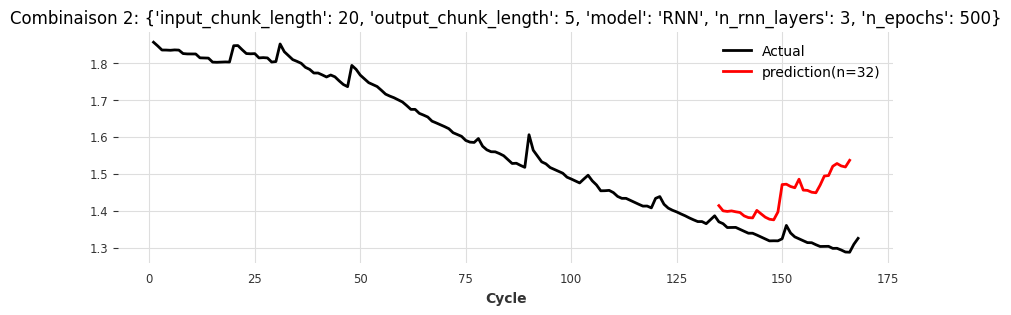

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=100` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

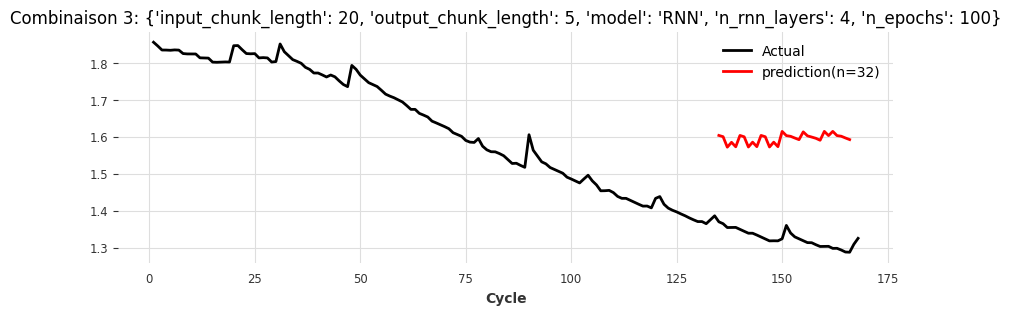

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=500` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

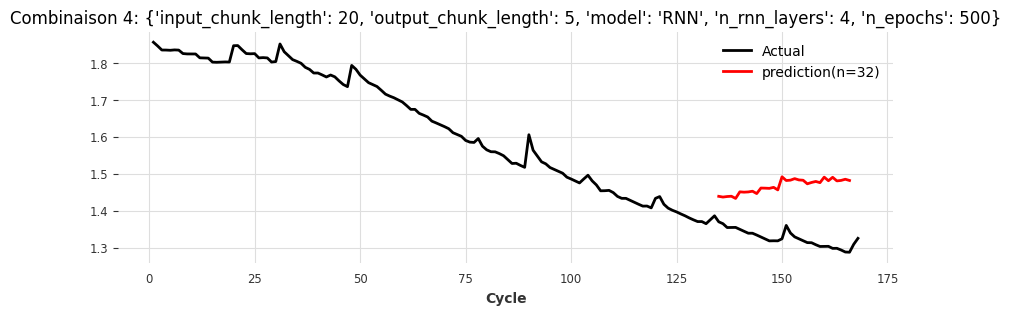

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=100` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

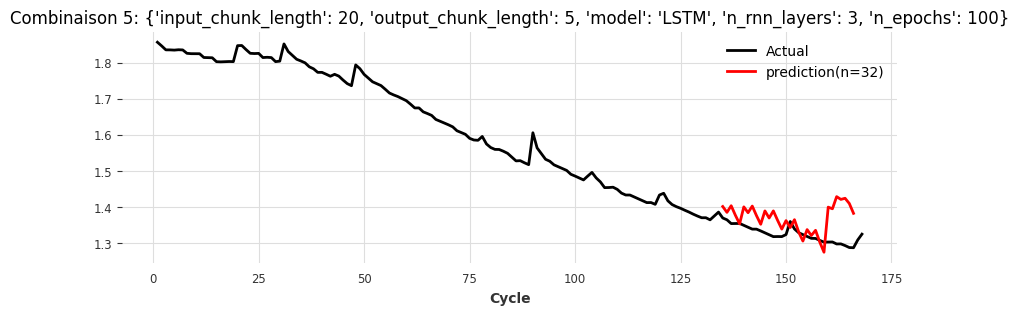

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=500` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

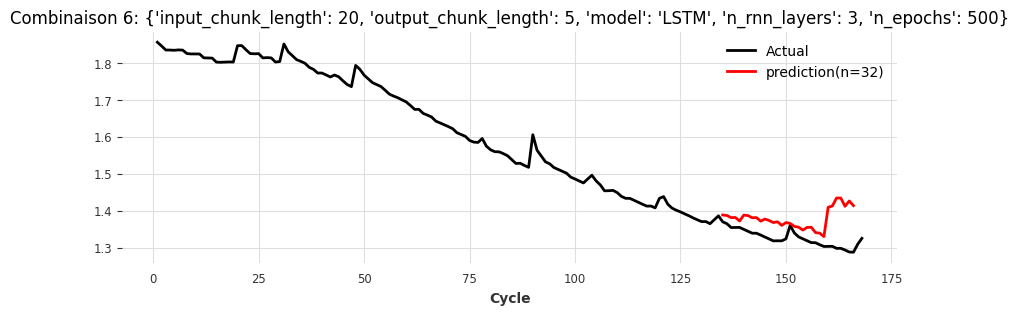

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=100` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

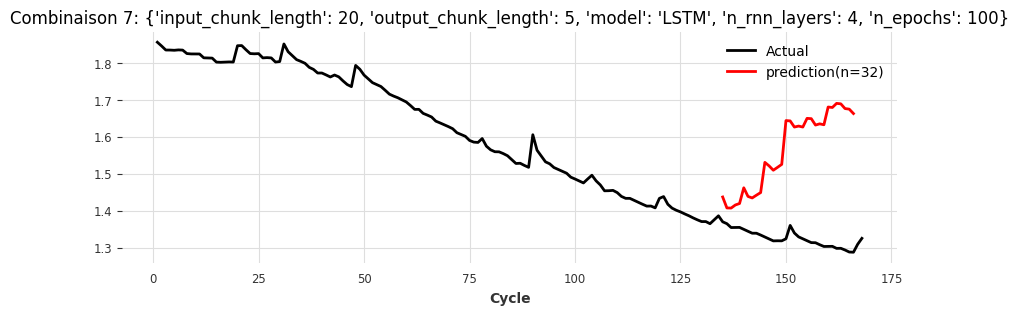

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=500` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

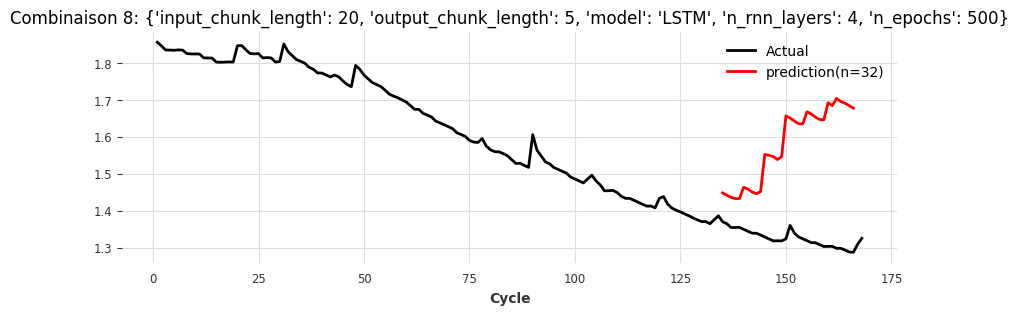

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=100` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

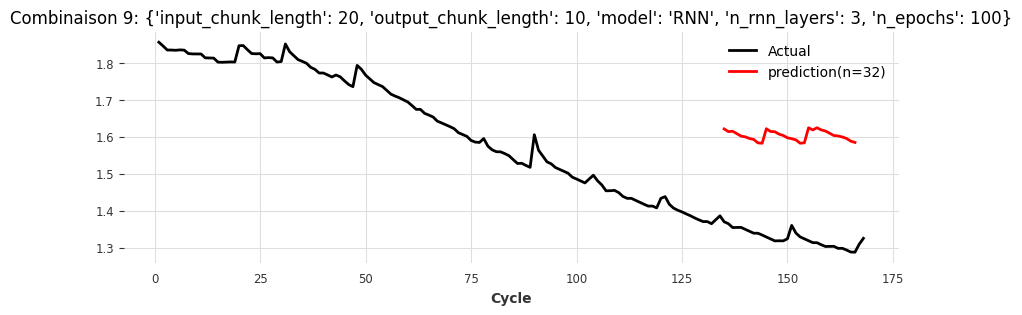

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=500` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

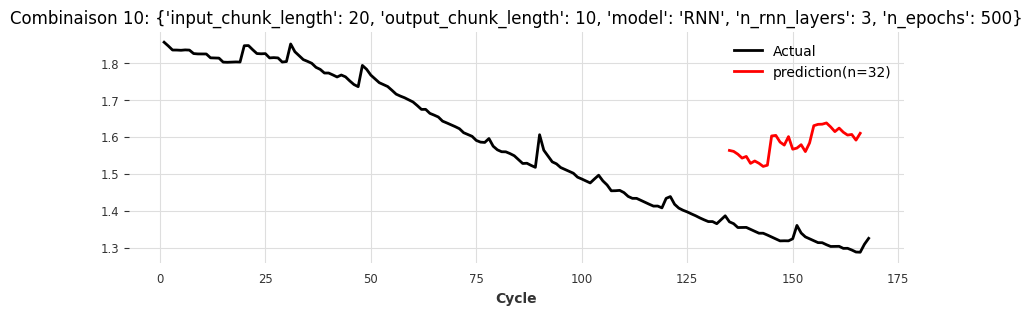

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=100` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

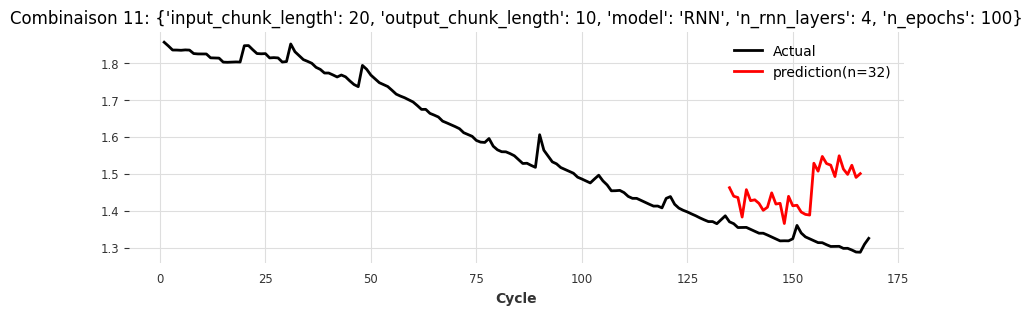

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=500` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

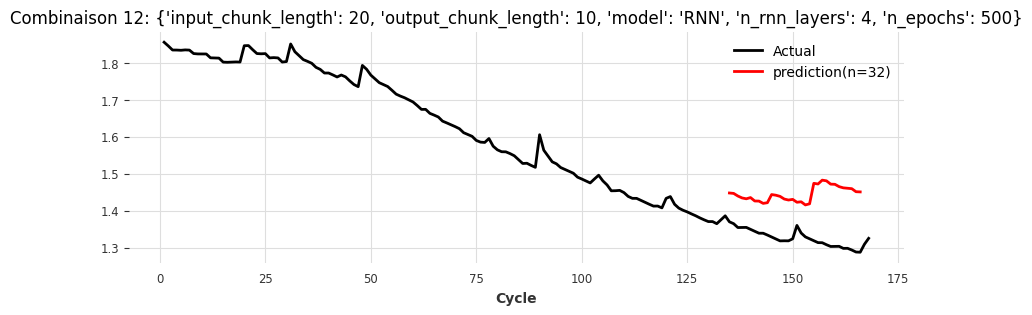

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=100` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

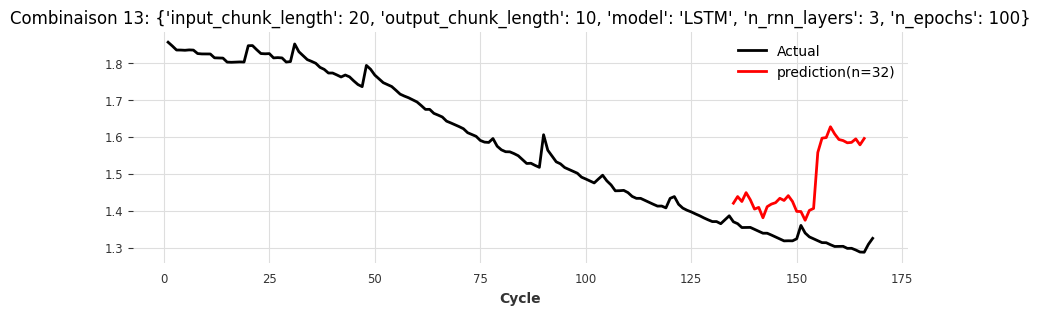

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=500` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

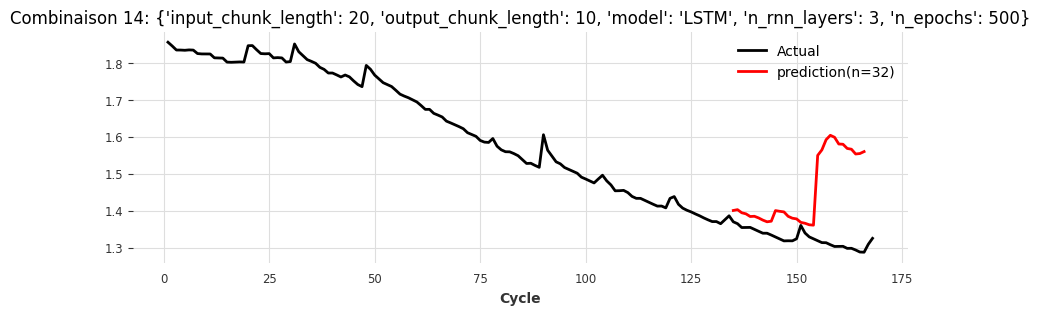

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=100` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

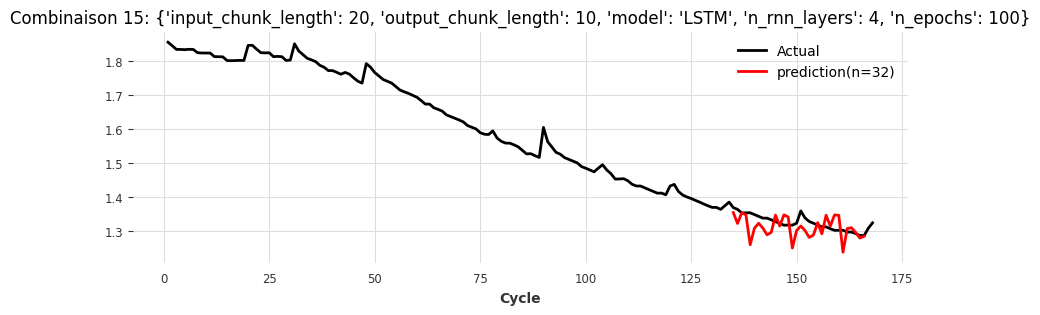

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=500` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

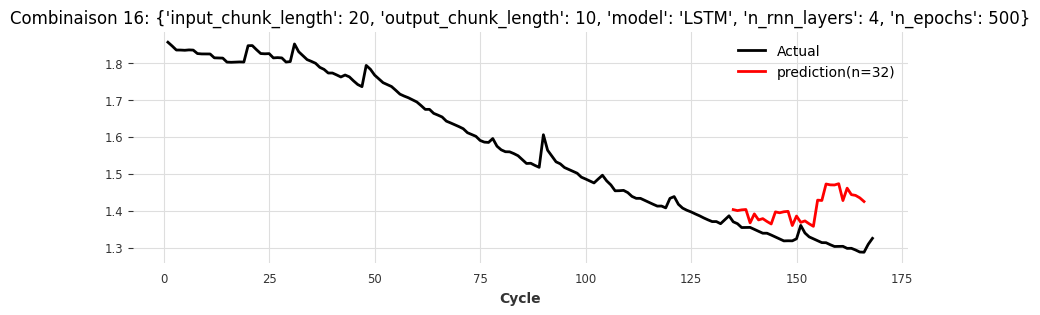

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=100` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

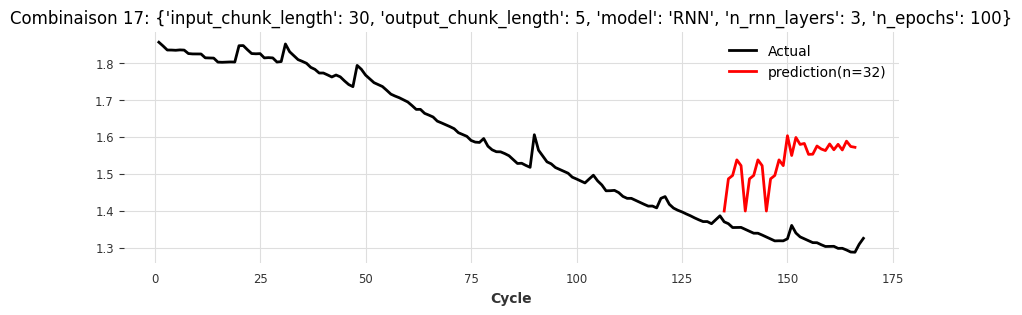

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=500` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

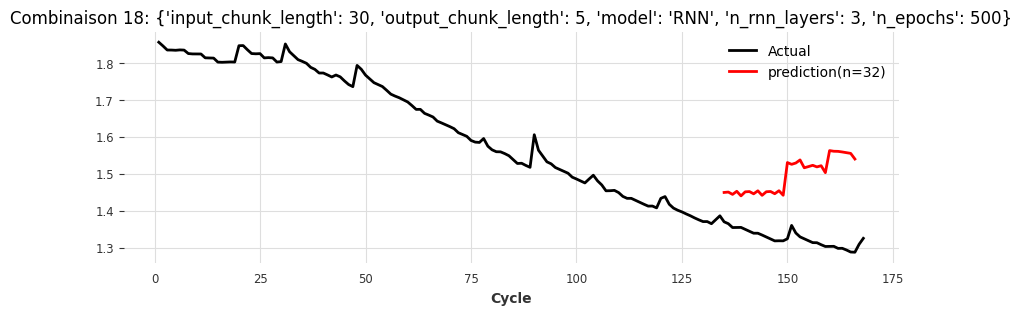

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=100` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

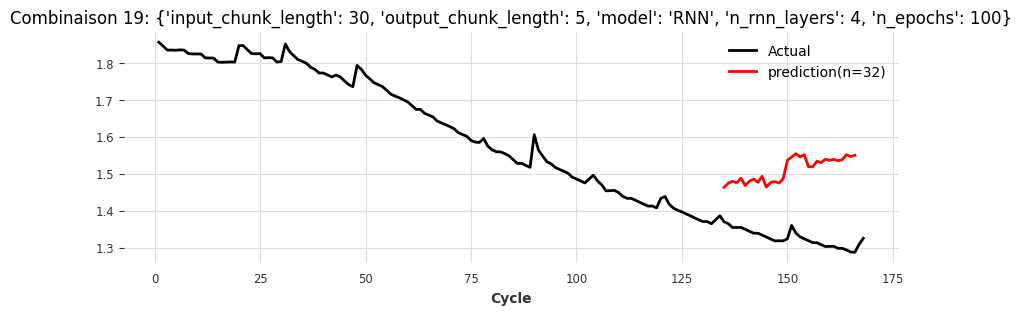

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=500` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

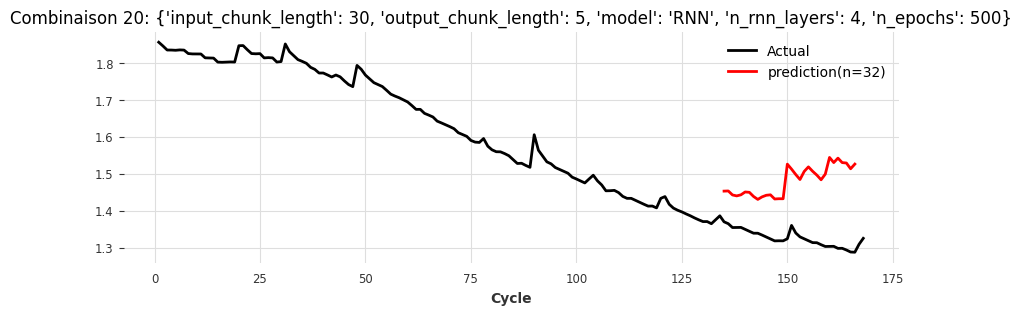

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=100` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

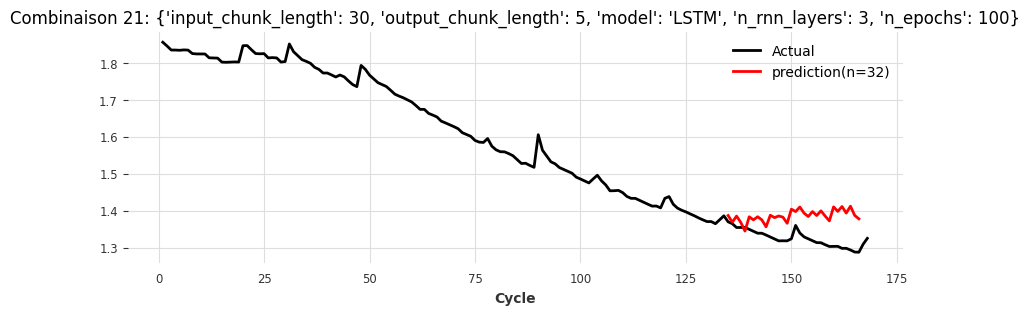

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=500` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

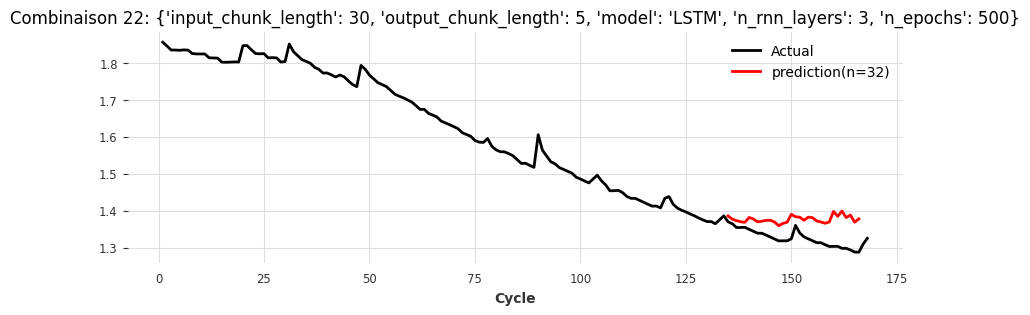

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=100` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

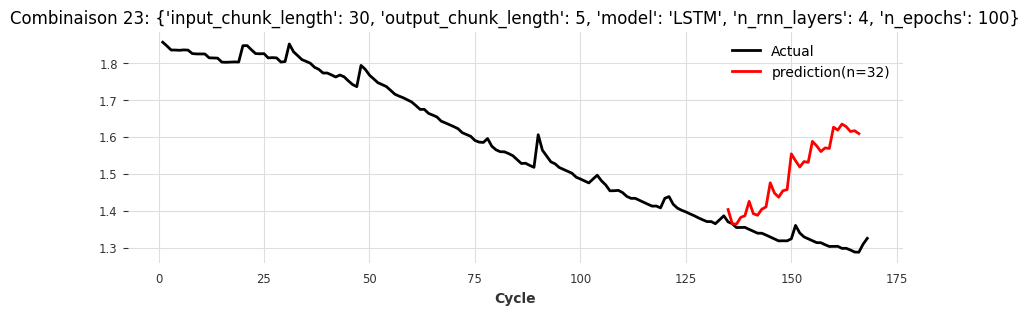

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=500` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

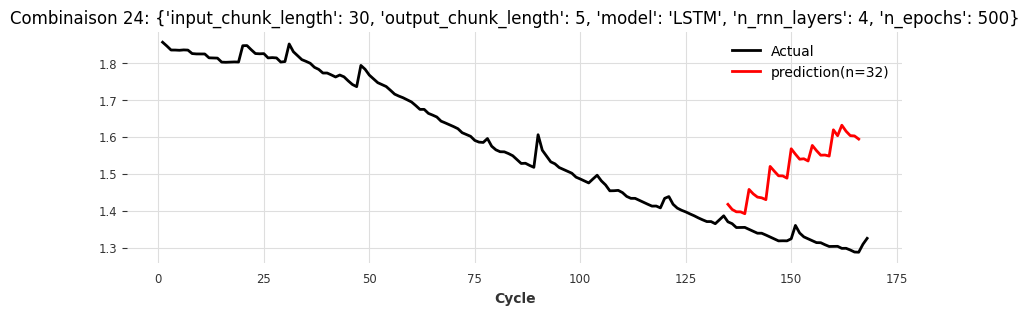

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=100` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

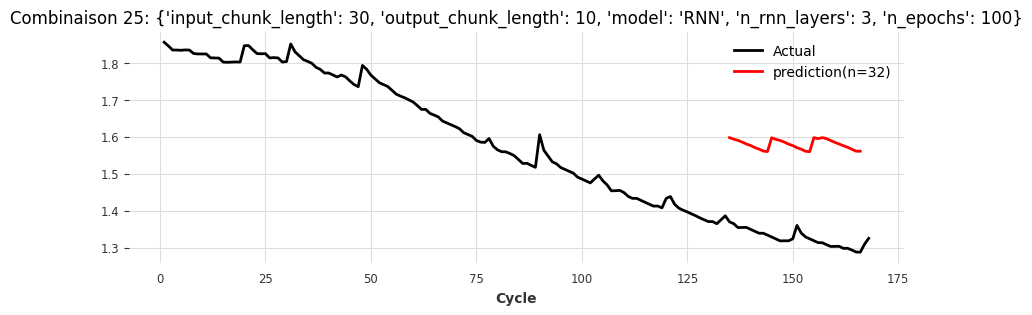

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=500` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

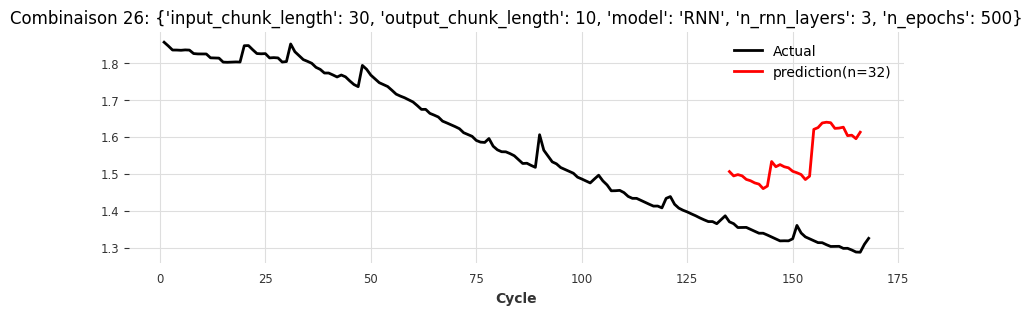

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=100` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

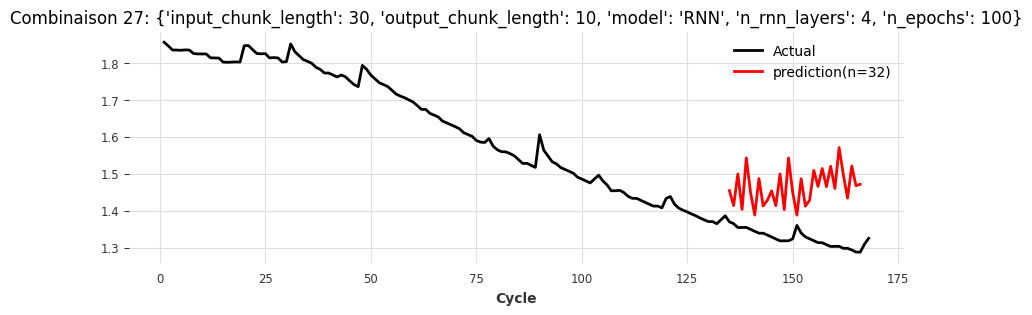

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=500` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

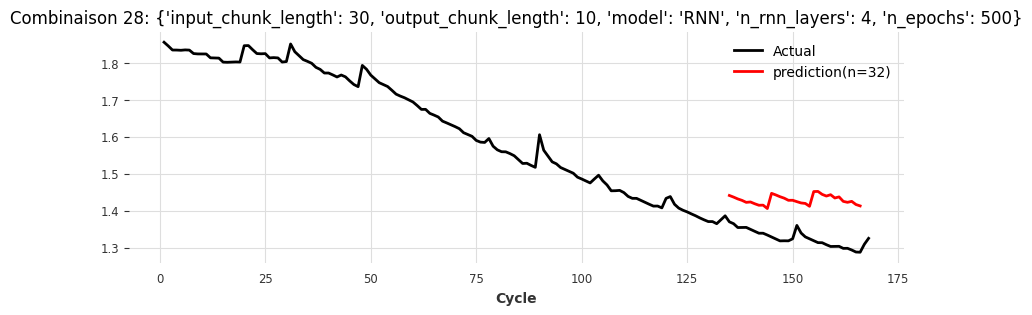

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=100` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

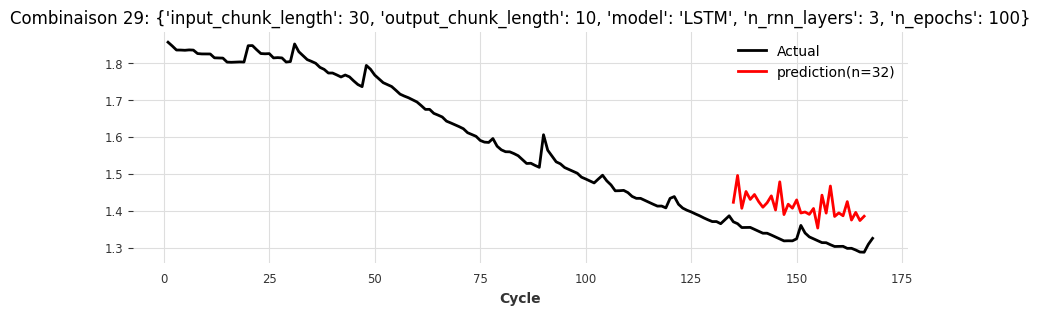

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=500` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

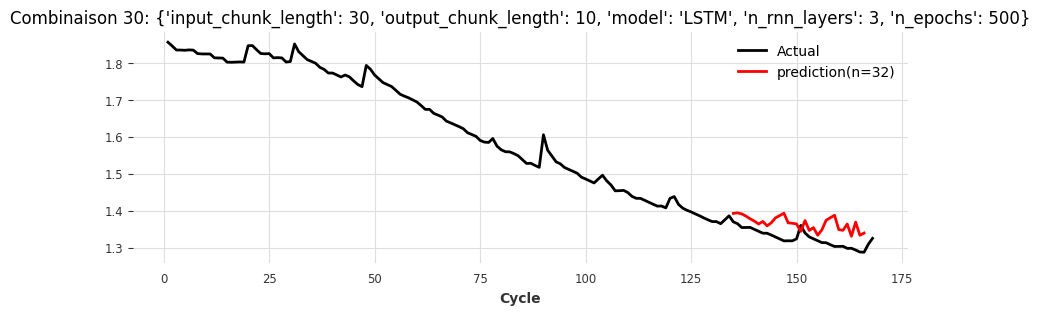

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=100` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

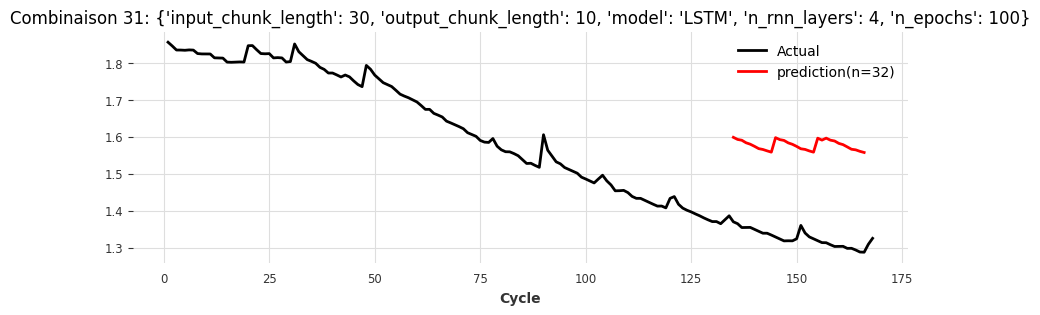

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=500` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

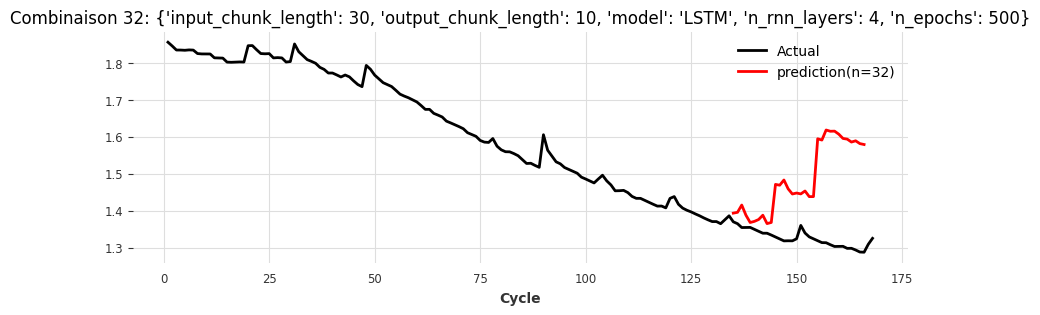

ValueError: too many values to unpack (expected 3)

In [ ]:
#Simple gridsearch without darts tools to identify the best evaluation metrics
parameters = {
        'input_chunk_length': [20, 30],
        'output_chunk_length': [5, 10],
        'model': ['RNN', 'LSTM'],
        'n_rnn_layers': [3, 4],
        'n_epochs': [100, 500]
}

# Générer toutes les combinaisons d'hyperparamètres
all_combinations = list(itertools.product(*parameters.values()))

# Stocker les résultats
results = []

# Parcourir chaque combinaison
for i, params in enumerate(all_combinations):
    # Convertir les paramètres en dictionnaire
    param_dict = dict(zip(parameters.keys(), params))

    # Initialiser et entraîner le modèle avec les paramètres actuels
    model = BlockRNNModel(
        model=param_dict['model'],
        input_chunk_length=param_dict['input_chunk_length'],
        output_chunk_length=param_dict['output_chunk_length'],
        n_rnn_layers=param_dict['n_rnn_layers'],
        n_epochs=param_dict['n_epochs'],
        random_state=seed_value
    )
    
    model.fit(train_dataset, past_covariates=past_covariates, epochs=param_dict['n_epochs'], verbose=False)
    future = model.predict(n=32,
                       series=train_dataset,
                       past_covariates=past_covariates)
    plt.figure(figsize=(10, 3))
    target_series.plot(label='Actual')
    future.plot(label='prediction(n=32)', color='red')
    plt.title(f"Combinaison {i+1}: {param_dict}")
    plt.legend()
    plt.show()
    
    # Évaluer le modèle
    mse_score = mse(test_dataset, future)
    rmse_score = rmse(test_dataset, future)
    mase_score = mase(test_dataset, future, train_dataset)
    mape_score = mape(test_dataset, future)
    
    # Stocker les résultats
    results.append((param_dict, mse_score, rmse_score, mase_score, mape_score))


[({'input_chunk_length': 20, 'output_chunk_length': 5, 'model': 'RNN', 'n_rnn_layers': 3, 'n_epochs': 100}, 0.03831070976036919, 0.1957312181548186, 19.705216162749036, 12.817723871260299), ({'input_chunk_length': 20, 'output_chunk_length': 5, 'model': 'RNN', 'n_rnn_layers': 3, 'n_epochs': 500}, 0.01818993939079305, 0.13487008337949913, 13.545494987637664, 8.817129683298553), ({'input_chunk_length': 20, 'output_chunk_length': 5, 'model': 'RNN', 'n_rnn_layers': 4, 'n_epochs': 100}, 0.07360274004175053, 0.2712982492419561, 31.542766001964942, 20.391769406741314), ({'input_chunk_length': 20, 'output_chunk_length': 5, 'model': 'RNN', 'n_rnn_layers': 4, 'n_epochs': 500}, 0.021514656165578346, 0.14667875158174187, 16.558517648386623, 10.733764636975206), ({'input_chunk_length': 20, 'output_chunk_length': 5, 'model': 'LSTM', 'n_rnn_layers': 3, 'n_epochs': 100}, 0.0038607308436695124, 0.062134779662194925, 5.682168926516139, 3.6977656219272426), ({'input_chunk_length': 20, 'output_chunk_length

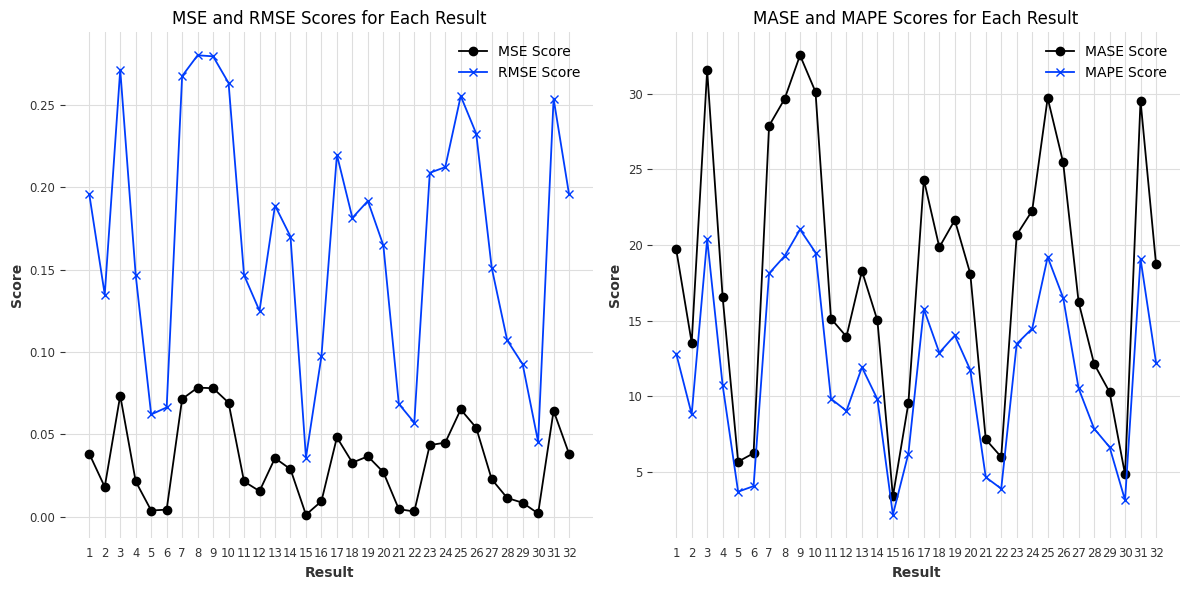

In [25]:
#Plot the result scores to evaluate the best metric
print(results)
mse_scores = [result[1] for result in results]
rmse_scores = [result[2] for result in results]
mase_scores = [result[3] for result in results]
mape_scores = [result[4] for result in results]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot RMSE scores and MSE scores against each result
ax1.plot(range(1, len(results) + 1), mse_scores, label='MSE Score', marker='o')
ax1.plot(range(1, len(results) + 1), rmse_scores, label='RMSE Score', marker='x')
ax1.set_xlabel('Result')
ax1.set_ylabel('Score')
ax1.set_title('MSE and RMSE Scores for Each Result')
ax1.set_xticks(range(1, len(results) + 1))
ax1.legend()
ax1.grid(True)

ax2.plot(range(1, len(results) + 1), mase_scores, label='MASE Score', marker='o')
ax2.plot(range(1, len(results) + 1), mape_scores, label='MAPE Score', marker='x')
ax2.set_xlabel('Result')
ax2.set_ylabel('Score')
ax2.set_title('MASE and MAPE Scores for Each Result')
ax2.set_xticks(range(1, len(results) + 1))
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#Gridsearch with integrated Dart tool. Faster but can only access the score of the best combination
parameters = {
        'input_chunk_length': [20],
        'output_chunk_length': [10],
        'model': ['LSTM'],
        'n_rnn_layers': [4],
        'n_epochs': [100, 200, 300, 1000]
}

# Appeler gridsearch
results_bis = BlockRNNModel.gridsearch(
    parameters,
    train_dataset,
    past_covariates=past_covariates,
    val_series = test_dataset,
    metric = mape,
    # reduction=np.mean, #comment les scores des métriques doivent être agrégés
    verbose=True,
    n_jobs=-1 #pour spécifier le nombre de process parallèles à utiliser lors de l'exécution de tâches
)

# Afficher le meilleur modèle
print(results_bis)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=100` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

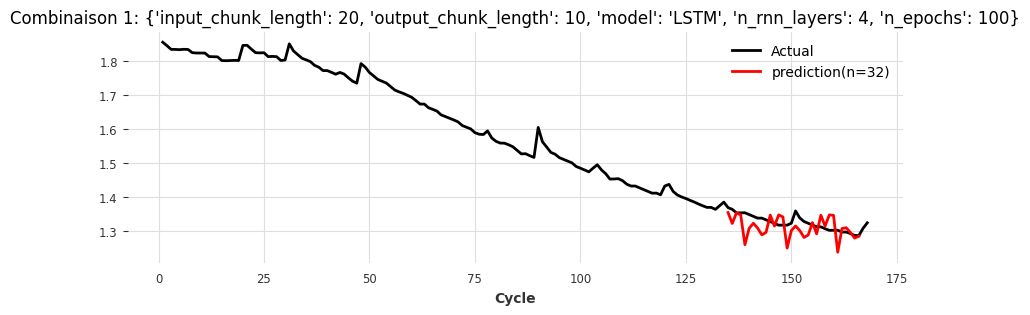

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=200` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

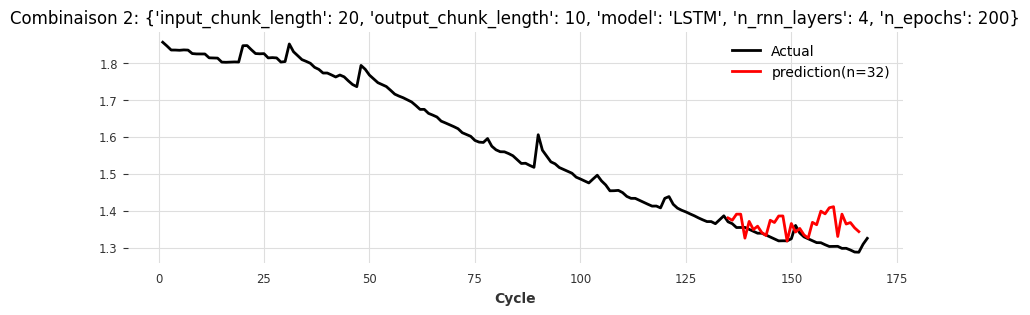

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=300` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

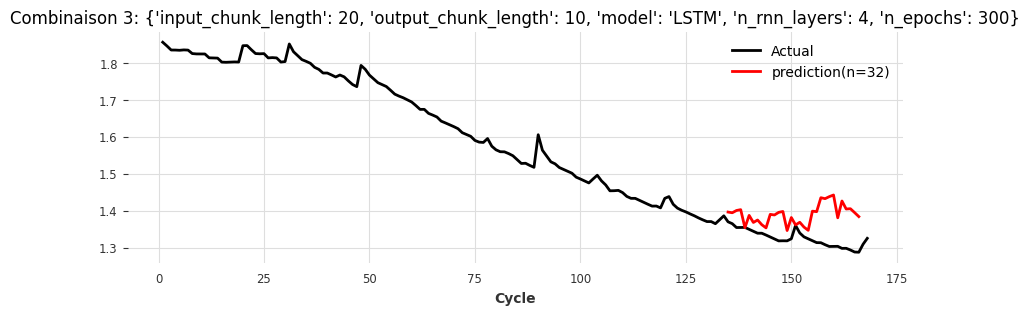

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=1000` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

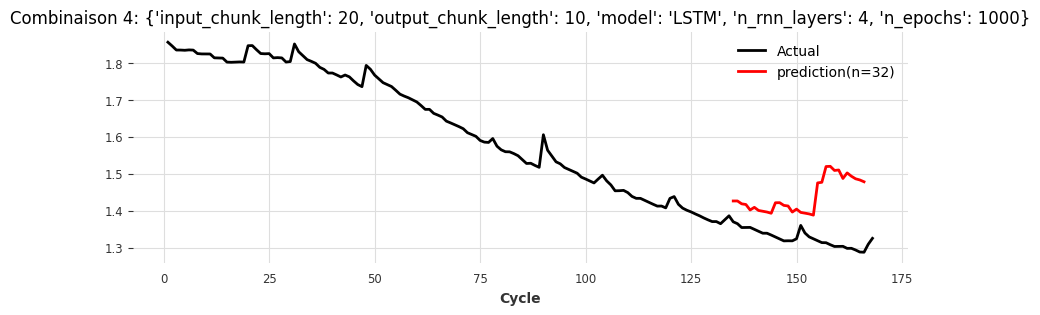

In [31]:
#Simple gridsearch without darts tools to identify the best evaluation metrics
parameters = {
        'input_chunk_length': [20],
        'output_chunk_length': [10],
        'model': ['LSTM'],
        'n_rnn_layers': [4],
        'n_epochs': [100, 200, 300, 1000]
}

# Générer toutes les combinaisons d'hyperparamètres
all_combinations = list(itertools.product(*parameters.values()))

# Stocker les résultats
best_models = []

# Parcourir chaque combinaison
for i, params in enumerate(all_combinations):
    # Convertir les paramètres en dictionnaire
    param_dict = dict(zip(parameters.keys(), params))

    # Initialiser et entraîner le modèle avec les paramètres actuels
    model = BlockRNNModel(
        model=param_dict['model'],
        input_chunk_length=param_dict['input_chunk_length'],
        output_chunk_length=param_dict['output_chunk_length'],
        n_rnn_layers=param_dict['n_rnn_layers'],
        n_epochs=param_dict['n_epochs'],
        random_state=seed_value
    )
    
    model.fit(train_dataset, past_covariates=past_covariates, epochs=param_dict['n_epochs'], verbose=False)
    future = model.predict(n=32,
                       series=train_dataset,
                       past_covariates=past_covariates)
    plt.figure(figsize=(10, 3))
    target_series.plot(label='Actual')
    future.plot(label='prediction(n=32)', color='red')
    plt.title(f"Combinaison {i+1}: {param_dict}")
    plt.legend()
    plt.show()
    
    # Évaluer le modèle
    mse_score = mse(test_dataset, future)
    rmse_score = rmse(test_dataset, future)
    mase_score = mase(test_dataset, future, train_dataset)
    mape_score = mape(test_dataset, future)
    
    # Stocker les résultats
    best_models.append((param_dict, mse_score, rmse_score, mase_score, mape_score))

In [101]:
#Train best model
best_model2 = BlockRNNModel(input_chunk_length=30,
                     output_chunk_length=10,
                     model='LSTM',
                     n_rnn_layers=3,
                     random_state=seed_value
                     )

best_model2.fit(train_dataset, 
                          past_covariates=past_covariates, 
                          epochs=500,)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 161 K  | train
6 | fc              | Sequential       | 260    | train
-------------------------------------------------------------
161 K     Trainable params
0         Non-trainable params
161 K     Total params
0.647     Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=500` reached.


BlockRNNModel(output_chunk_shift=0, model=LSTM, hidden_dim=25, n_rnn_layers=3, hidden_fc_sizes=None, dropout=0.0, activation=ReLU, input_chunk_length=30, output_chunk_length=10, random_state=0)

`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

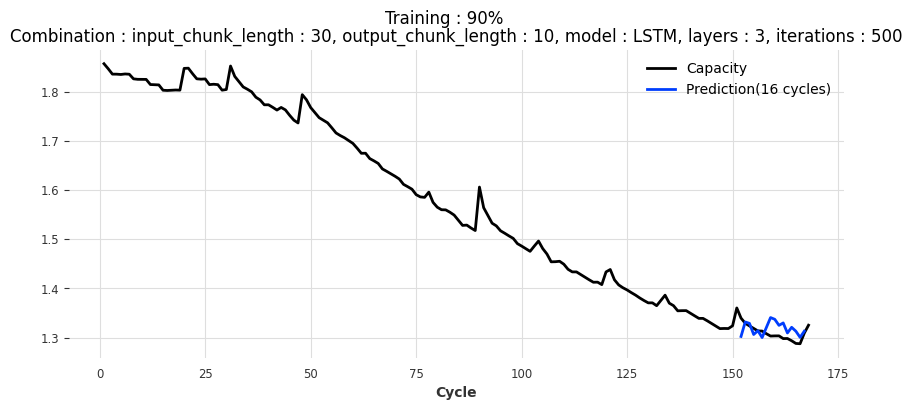

In [103]:
#Make prediction with the best model
future = best_model2.predict(n=16,
                       series=train_dataset,
                       past_covariates=past_covariates)
plt.figure(figsize=(10, 4))
target_series.plot()
future.plot(label='Prediction(16 cycles)')
plt.suptitle("Training : 90%")
plt.title("Combination : input_chunk_length : 30, output_chunk_length : 10, model : LSTM, layers : 3, iterations : 500")
plt.legend()
plt.show()